<a href="https://colab.research.google.com/github/Saiharshi1/HDS5210_InClass/blob/master/week13/week13_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [29]:
import pandas as pd
data = pd.read_csv("Hypertension_data.csv")

data.shape

(1007, 6)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [30]:
def analyze_column_diversity(df):

    unique_counts = df.nunique()

    sorted_counts = unique_counts.sort_values(ascending=False)

    summary = pd.DataFrame({
        'Column': sorted_counts.index,
        'Unique Values': sorted_counts.values,
        'Total Rows': len(df),
        'Percent Unique': (sorted_counts.values / len(df) * 100).round(2)
    })

    print("\nColumn Diversity Analysis:")
    print("=" * 80)
    print(summary.to_string(index=False))
    print("\nColumn with most diversity:", summary.iloc[0]['Column'])
    print(f"Number of unique values: {summary.iloc[0]['Unique Values']}")
    print(f"Percentage unique: {summary.iloc[0]['Percent Unique']}%")

    return summary

analyze_column_diversity(data)


Column Diversity Analysis:
       Column  Unique Values  Total Rows  Percent Unique
          BMI            669        1007           66.43
    heartRate             60        1007            5.96
          age             36        1007            3.57
    education              4        1007            0.40
currentSmoker              2        1007            0.20
 prevalentHyp              2        1007            0.20

Column with most diversity: BMI
Number of unique values: 669
Percentage unique: 66.43%


,Column,Unique Values,Total Rows,Percent Unique
0,BMI,669,1007,66.43
1,heartRate,60,1007,5.96
2,age,36,1007,3.57
3,education,4,1007,0.40
4,currentSmoker,2,1007,0.20
5,prevalentHyp,2,1007,0.20


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [31]:
def analyze_redundant_columns(df):

    redundant_cols = {}

    for column in df.columns:
        unique_values = df[column].nunique()
        if unique_values == 1:
            constant_value = df[column].iloc[0]
            redundant_cols[column] = constant_value

    print("\nRedundancy Analysis Results:")
    print("=" * 50)

    if redundant_cols:
        print(f"\nFound {len(redundant_cols)} redundant column(s):")
        for col, value in redundant_cols.items():
            print(f"\nColumn: {col}")
            print(f"Constant Value: {value}")
            print(f"Data Type: {type(value).__name__}")
    else:
        print("\nNo redundant columns found - all columns have varying values")

    return redundant_cols

analyze_redundant_columns(data)


Redundancy Analysis Results:

No redundant columns found - all columns have varying values


{}

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

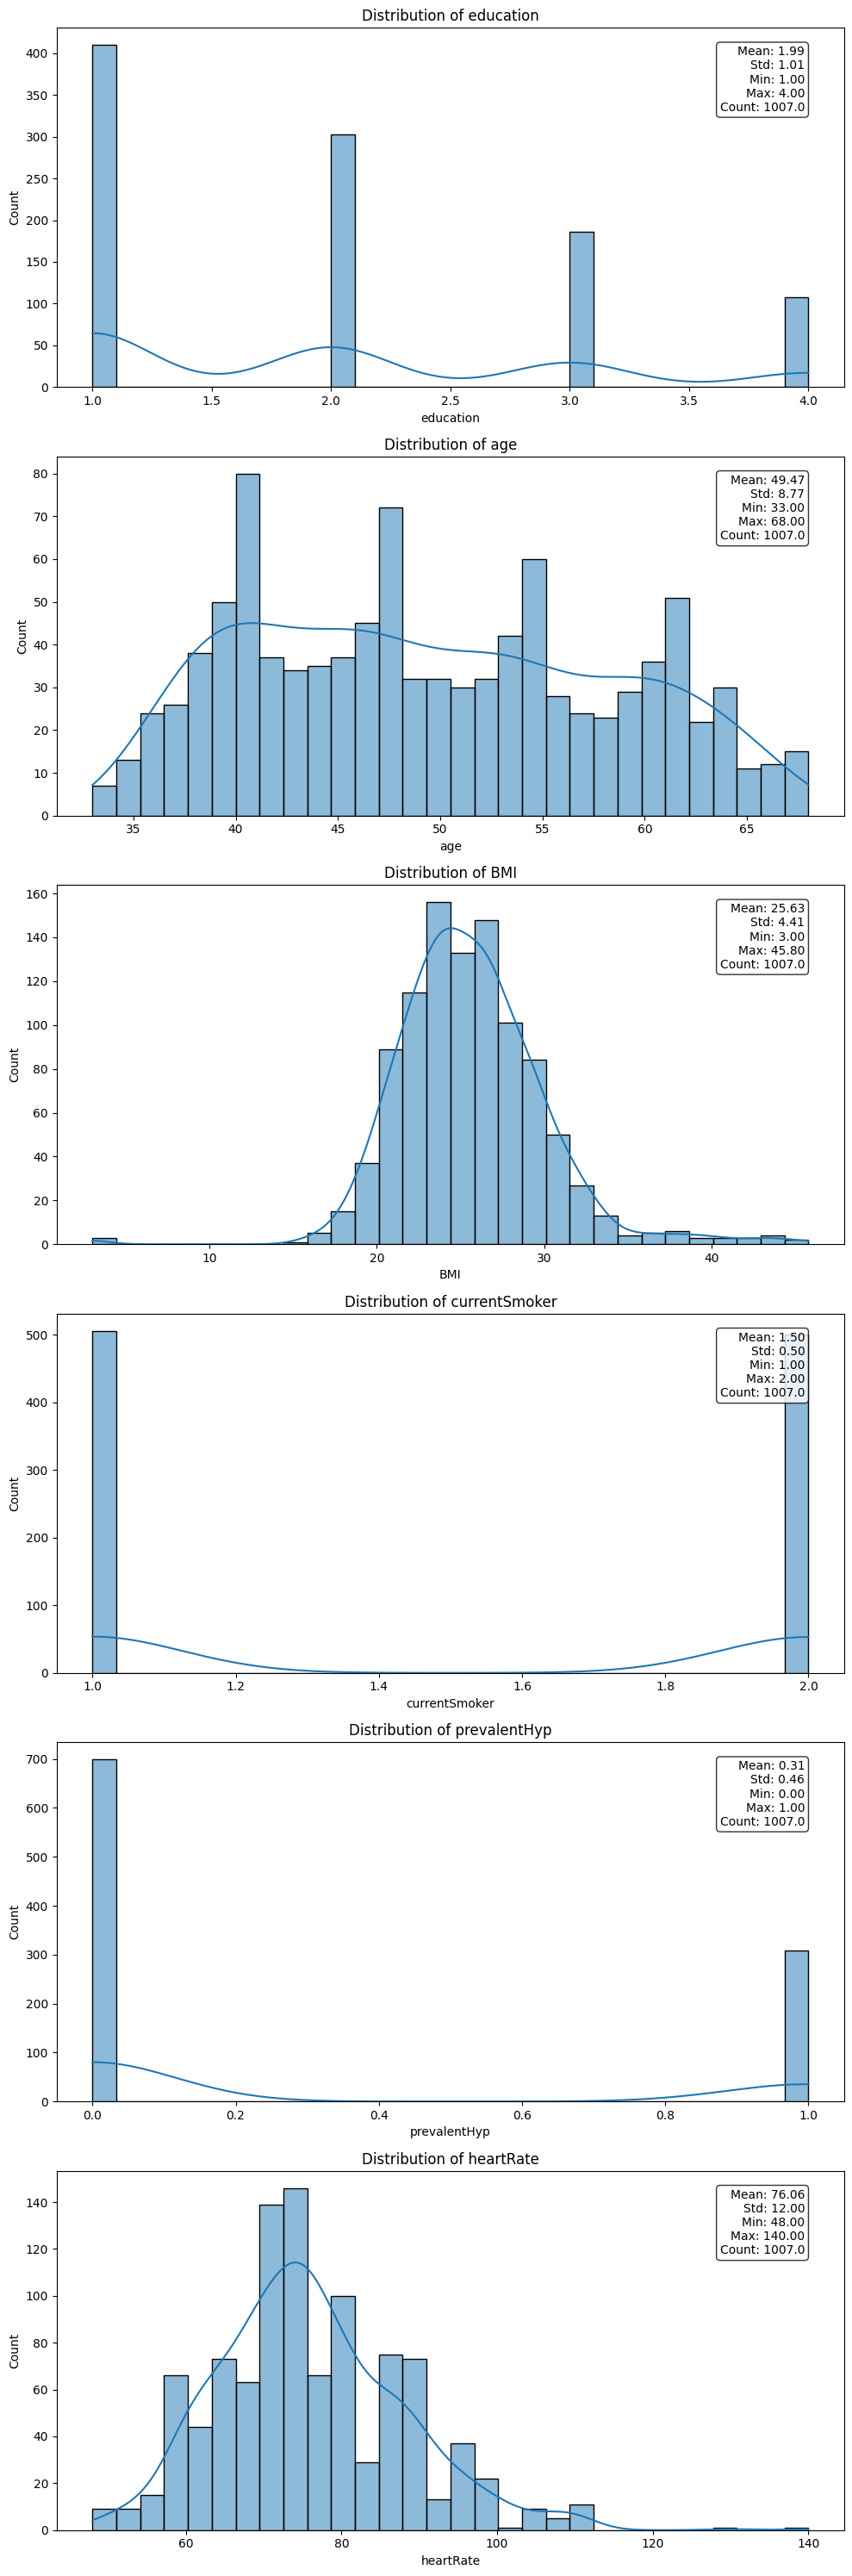

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = data.select_dtypes(include=[np.number]).columns

if len(numeric_cols) == 0:
    print("No numeric columns found in the dataset")

n_cols = len(numeric_cols)
fig, axes = plt.subplots(n_cols, 1, figsize=(10, 5*n_cols))
if n_cols == 1:
    axes = [axes]

for ax, col in zip(axes, numeric_cols):
    sns.histplot(data=data, x=col, ax=ax, bins=30, kde=True)

    stats = data[col].describe()
    stats_text = (f'Mean: {stats["mean"]:.2f}\n'
                 f'Std: {stats["std"]:.2f}\n'
                 f'Min: {stats["min"]:.2f}\n'
                 f'Max: {stats["max"]:.2f}\n'
                 f'Count: {stats["count"]}')

    ax.text(0.95, 0.95, stats_text,
            transform=ax.transAxes,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

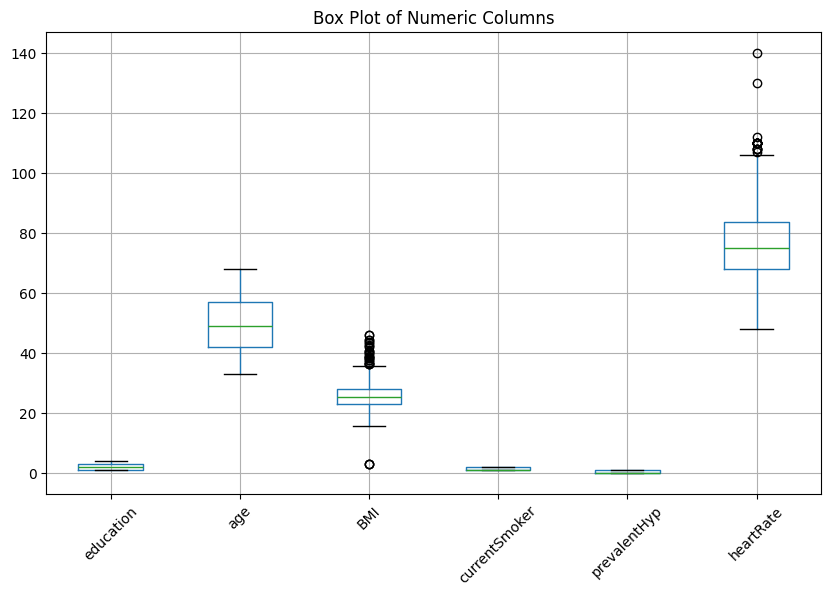

In [28]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts().head())

# 5. Simple box plot for numeric columns
plt.figure(figsize=(10, 6))
data[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns')
plt.show()



---



## Submitting Your Work

Submit your work as usual.